# PUNTO 1

## 1.1 

### Extracción de los Datos

In [1]:
import pandas as pd
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(url, header=None, delimiter=r"\s+", names=column_names)

# Muestra las primeras filas del DataFrames
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Partición y Estandarización de X

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('MEDV', axis=1)  
y = df['MEDV']               

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Evaluación de los Alphas

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

#### El Alpha controla la penalización de los coeficientes del modelo, para prevenir el sobreajuste y mejorar la generalización.

#### Para la regresión Ridge, la penalización es proporcional al cuadrado de la magnitud de los coeficientes (norma L2). 

#### En LASSO, la penalización es proporcional a la magnitud absoluta de los coeficientes (norma L1).

#### Elastic-Net es una combinación de Ridge y LASSO. Utiliza ambas penalizaciones L1 y L2.  

#### λ (a menudo llamado l1_ratio en implementaciones) es otro parámetro que balancea la contribución de L1 frente a L2. 𝛼 sigue siendo el parámetro general de penalización que controla la cantidad total de regularización.


#### NORMALIZAR

In [5]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_normalized = (X - X_mean) / X_std

#### GRAFICAR  
$$
\boldsymbol{\beta} = (\mathbf{X}^\top \mathbf{X} + \alpha \mathbf{I})^{-1} \mathbf{X}^\top \mathbf{y}
$$

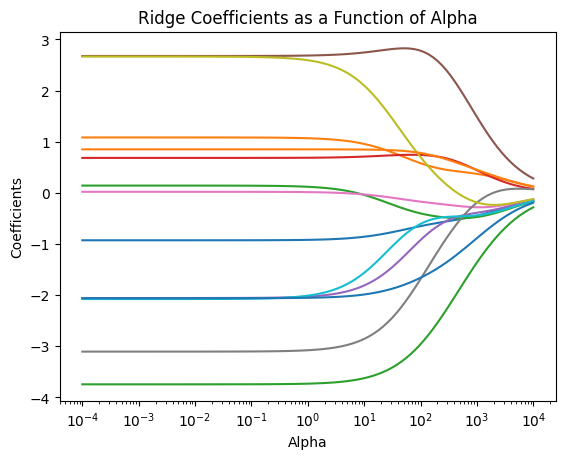

In [7]:
alphas = np.logspace(-4, 4, 100)
coefficients_ridge = []

for alpha in alphas:
    identity_matrix = np.eye(X_normalized.shape[1])
    ridge_coeff = np.linalg.inv(X_normalized.T @ X_normalized + alpha * identity_matrix) @ X_normalized.T @ y
    coefficients_ridge.append(ridge_coeff)

# Visualización de los coeficientes de Ridge
import matplotlib.pyplot as plt
plt.plot(alphas, coefficients_ridge)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Coefficients as a Function of Alpha')
plt.show()

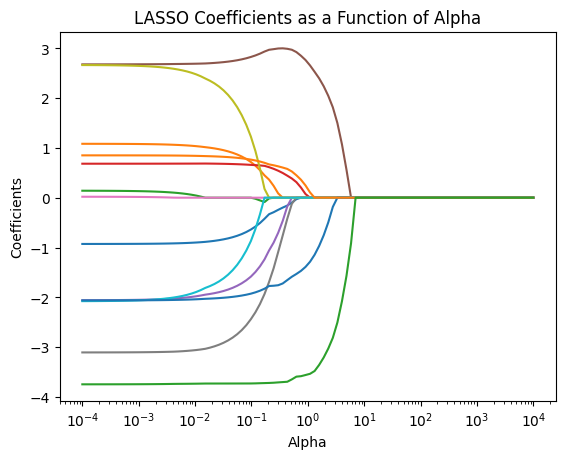

In [8]:
# Importaremos la clase Lasso de scikit-learn solo para la facilidad de cálculo
from sklearn.linear_model import Lasso

coefficients_lasso = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, fit_intercept=False)
    lasso.fit(X_normalized, y)
    coefficients_lasso.append(lasso.coef_)

# Visualización de los coeficientes de LASSO
plt.plot(alphas, coefficients_lasso)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('LASSO Coefficients as a Function of Alpha')
plt.show()

### CRECIÓN DE LOS MODELOS

#### GridSearchCV es una herramienta que ayuda a automatizar el proceso de ajuste de parámetros para encontrar el mejor modelo posible.

#### Buscar exhaustivamente: Prueba todas las combinaciones posibles de los parámetros que se especifican.GridSearchCV entrenará un modelo para cada valor utilizando la técnica de validación cruzada.

#### Validación Cruzada: Para cada conjunto de parámetros, utiliza el método de validación cruzada (se especifica en el parámetro cv) para evaluar el rendimiento del modelo. 

#### Selección del Mejor Modelo: Una vez que todos los modelos han sido evaluados, selecciona el modelo que tuvo el mejor rendimiento de acuerdo con la métrica de rendimiento que se haya especificado (ejm: precisión, AUC ROC, RMSE, etc.).

#### RIDGE

In [12]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha': np.logspace(-4, 4, 100)}
ridge_cv = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train_scaled, y_train)

print("Mejor valor de alpha para Ridge:", ridge_cv.best_params_)
print("Mejor score para Ridge:", ridge_cv.best_score_)

Mejor valor de alpha para Ridge: {'alpha': 2.310129700083163}
Mejor score para Ridge: -23.64607294897078


In [22]:
np.log10(2.310129700083163)

0.3636363636363642

##### Eso significa que GridSearchCV eligió a $$ 10^{0.363}$$

#### LASSO

In [23]:
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train_scaled, y_train)

print("Mejor valor de alpha para LASSO:", lasso_cv.best_params_)
print("Mejor score para LASSO:", lasso_cv.best_score_)

Mejor valor de alpha para LASSO: {'alpha': 0.0001}
Mejor score para LASSO: -23.654589851597517


In [29]:
np.log10(0.0001)

-4.0

##### Eso significa que GridSearchCV eligió a $$ 10^{-4}$$ 
##### El valor más extremo, por lo cuál podríamos intentar analizar ampliando el rango de búsqueda de alpha

In [32]:
lasso = Lasso()
parameters = {'alpha': np.logspace(-6, 6, 200)}
lasso_cv = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train_scaled, y_train)

print("Mejor valor de alpha para LASSO:", lasso_cv.best_params_)
print("Mejor score para LASSO:", lasso_cv.best_score_)

Mejor valor de alpha para LASSO: {'alpha': 1e-06}
Mejor score para LASSO: -23.654419976103718


In [33]:
np.log10(1e-06)

-6.0

##### Nuevamente eligió el valor más extremo, por lo que puede estar indicando que El modelo está posiblemente sufriendo de subajuste cuando 𝛼 es más alto, es decir, la introducción de la regularización está degradando la capacidad del modelo para capturar la relación subyacente en los datos.

#### ELASTIC NET

In [24]:
elastic_net = ElasticNet()
parameters_en = {'alpha': np.logspace(-4, 4, 100), 'l1_ratio': np.linspace(0.01, 1, 25)}
elastic_net_cv = GridSearchCV(elastic_net, parameters_en, scoring='neg_mean_squared_error', cv=5)
elastic_net_cv.fit(X_train_scaled, y_train)

print("Mejores parámetros para Elastic-Net:", elastic_net_cv.best_params_)
print("Mejor score para Elastic-Net:", elastic_net_cv.best_score_)

Mejores parámetros para Elastic-Net: {'alpha': 0.007220809018385471, 'l1_ratio': 0.01}
Mejor score para Elastic-Net: -23.64626672260496


In [30]:
np.log10(0.007220809018385471)

-2.141414141414141

##### Eso significa que GridSearchCV eligió a $$ 10^{-2.14}$$ 

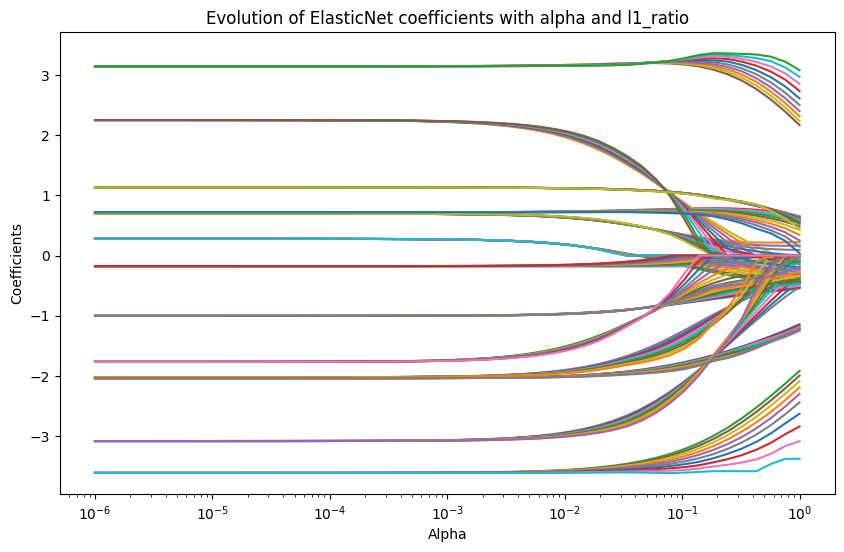

In [40]:
# Asumimos que 'alphas' y 'l1_ratios' se extraen de GridSearchCV
alphas = np.logspace(-6, 0, 50)  # Ejemplo: Ajusta según tus rangos explorados
l1_ratios = np.linspace(0.01, 1.0, 10)  # Ejemplo: Ajusta según tus rangos explorados

# Crear un gráfico
plt.figure(figsize=(10, 6))

# Reentrenar y recoger coeficientes
for l1_ratio in l1_ratios:
    coefs = []
    for alpha in alphas:
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        model.fit(X_train_scaled, y_train)
        coefs.append(model.coef_)
    
    coefs = np.array(coefs)
    
    # Graficar la evolución de los coeficientes para este l1_ratio
    for i in range(coefs.shape[1]):  # Asumiendo que tienes más de un coeficiente
        plt.plot(alphas, coefs[:, i], label=f'Feature {i+1} at l1_ratio={l1_ratio}')
    
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Evolution of ElasticNet coefficients with alpha and l1_ratio')
plt.show()

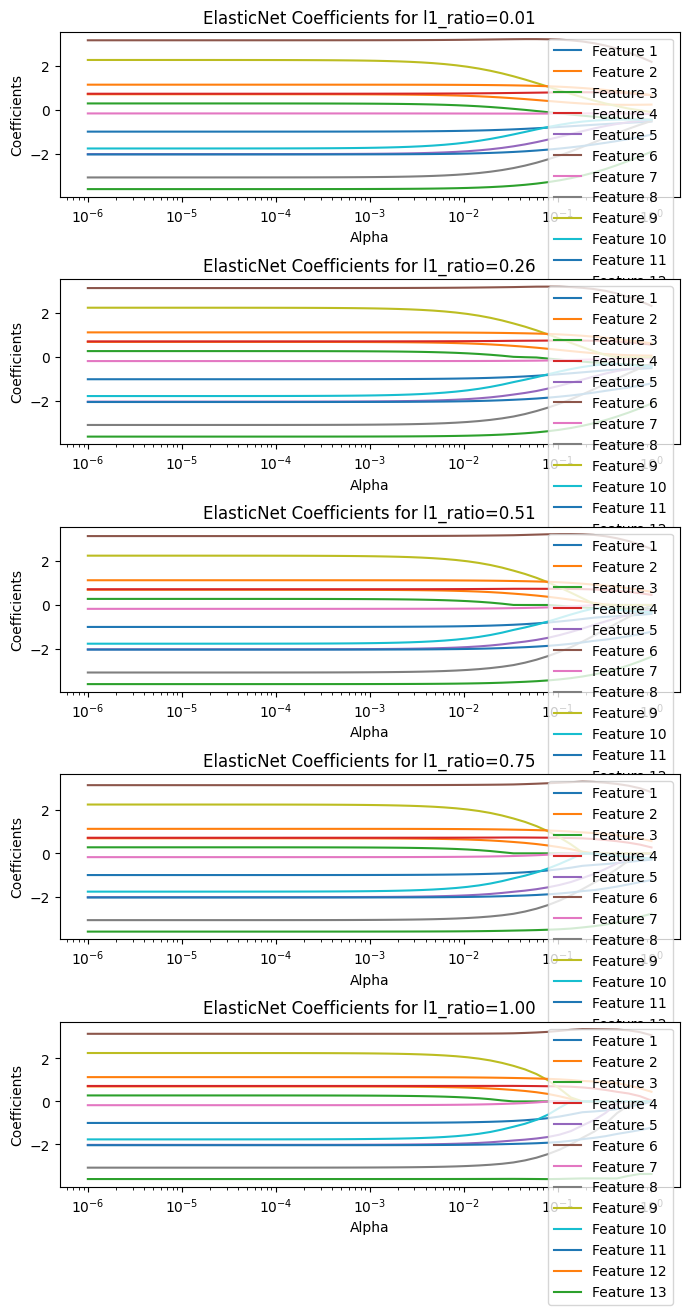

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet

# Definir los valores de alpha y l1_ratio
alphas = np.logspace(-6, 0, 50)  # Ajusta esto según tu rango explorado
l1_ratios = np.linspace(0.01, 1.0, 5)  # 5 diferentes l1_ratios para demostración

# Crear subplots
fig, axes = plt.subplots(nrows=len(l1_ratios), ncols=1, figsize=(8, 15))
fig.subplots_adjust(hspace=0.5)  # Ajustar el espacio entre gráficos

# Reentrenar y recoger coeficientes para cada l1_ratio
for idx, l1_ratio in enumerate(l1_ratios):
    coefs = []
    for alpha in alphas:
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        model.fit(X_train_scaled, y_train)
        coefs.append(model.coef_)
    
    coefs = np.array(coefs)
    
    # Graficar la evolución de los coeficientes para este l1_ratio en su subplot
    for i in range(coefs.shape[1]):  # Asumiendo que tienes más de un coeficiente
        axes[idx].plot(alphas, coefs[:, i], label=f'Feature {i+1}')
    
    axes[idx].set_xscale('log')
    axes[idx].set_xlabel('Alpha')
    axes[idx].set_ylabel('Coefficients')
    axes[idx].set_title(f'ElasticNet Coefficients for l1_ratio={l1_ratio:.2f}')
    axes[idx].legend()

plt.show()

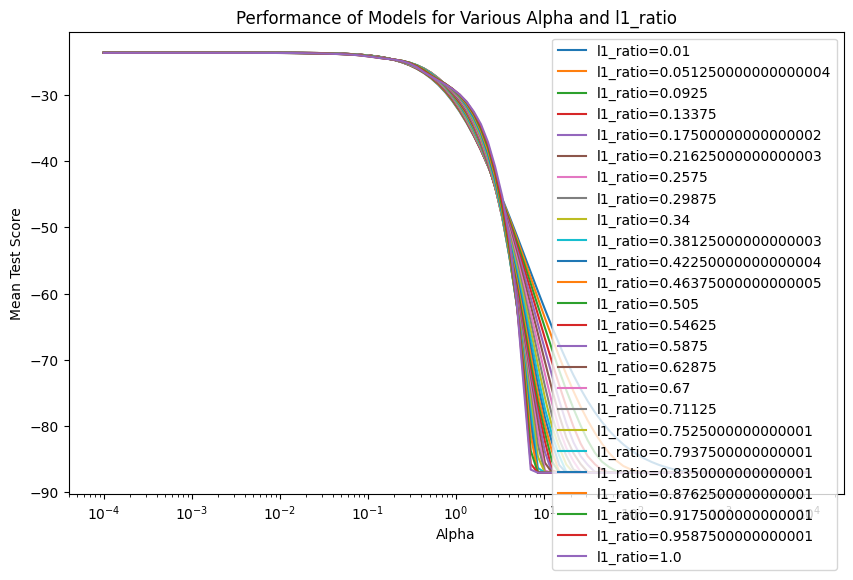

In [31]:
# Convertir los resultados a un DataFrame
results = pd.DataFrame(elastic_net_cv.cv_results_)

# Visualización
plt.figure(figsize=(10, 6))
for l1_ratio in results['param_l1_ratio'].unique():
    subset = results[results['param_l1_ratio'] == l1_ratio]
    plt.plot(subset['param_alpha'], subset['mean_test_score'], label=f'l1_ratio={l1_ratio}')

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Test Score')
plt.title('Performance of Models for Various Alpha and l1_ratio')
plt.legend()
plt.show()

#### La caída pronunciada en el rendimiento a medida que 𝛼 aumenta podría indicar que el modelo comienza a sufrir de subajuste. A valores muy altos de 𝛼, la penalización se hace tan dominante que los coeficientes del modelo se reducen significativamente, posiblemente hacia cero. Esto lleva a que el modelo pierda la capacidad de capturar la variabilidad de los datos y, por lo tanto, su rendimiento decrece notablemente

#### Todos los scores están en formato negativo porque GridSearchCV utiliza "negative mean squared error" (error cuadrático medio negativo) como la métrica para la evaluación. Esto significa que valores más cercanos a cero son mejores, ya que representan un error más bajo.

#### El hecho de que LASSO y Elastic-Net tengan configuraciones óptimas con un 𝛼 muy bajo sugiere que podrían no estar aprovechando al máximo su capacidad de regularización. Específicamente para Elastic-Net, un l1_ratio tan bajo indica que la penalización está siendo aplicada casi en su totalidad como regularización L2 (Ridge), con solo una pequeña parte de la penalización L1 (LASSO).

### REVISIÓN DE LOS COEFICIENTES

In [34]:
# Coeficientes de Ridge
coefficients_ridge = ridge_cv.best_estimator_.coef_

# Coeficientes de LASSO
coefficients_lasso = lasso_cv.best_estimator_.coef_

# Coeficientes de Elastic-Net
coefficients_elastic_net = elastic_net_cv.best_estimator_.coef_

print(f"Coeficientes de Ridge: {coefficients_ridge}")
print(f"Coeficientes de LASSO: {coefficients_lasso}")
print(f"Coeficientes de Elastic-Net: {coefficients_elastic_net}")

Coeficientes de Ridge: [-0.9799235   0.65515706  0.221005    0.726986   -1.9511889   3.15898799
 -0.17863612 -2.99834436  2.07887188 -1.61036187 -2.0153308   1.12411829
 -3.58282066]
Coeficientes de LASSO: [-1.00213255  0.69626365  0.27805573  0.71873855 -2.02231308  3.1452402
 -0.17604561 -3.08190058  2.25138858 -1.76699577 -2.03774966  1.12956712
 -3.61165817]
Coeficientes de Elastic-Net: [-0.9745792   0.64540755  0.20749467  0.72884808 -1.93381539  3.16200437
 -0.1790112  -2.97782412  2.03867124 -1.57434459 -2.00985394  1.12268482
 -3.57583036]


Ridge: Generalmente no reduce los coeficientes exactamente a cero. Por lo tanto, todas las variables permanecen en el modelo, pero con coeficientes posiblemente reducidos.
LASSO: Es conocido por su capacidad de realizar selección de variables al reducir los coeficientes de algunas variables exactamente a cero, lo que efectivamente las elimina del modelo.Para este caso, no lo hizo
Elastic-Net: Combina las propiedades de Ridge y LASSO. Reduce algunos coeficientes a cero (como LASSO) y reduce otros (como Ridge).

Los coeficientes más grandes en magnitud (positivos o negativos) sugieren una mayor influencia en la variable respuesta. Por ejemplo, el coeficiente para la sexta variable sugiere una fuerte influencia positiva en la variable respuesta en los 3 modelos.

$$
\text{Ridge Regression:} \\
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \ldots + \beta_{13} X_{13}
$$

$$
\text{LASSO Regression:} \\
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \ldots + \beta_{13} X_{13}
$$

$$
\text{Elastic-Net Regression:} \\
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \ldots + \beta_{13} X_{13}
$$

### EVALUAR LOS MODELOS

In [35]:
from sklearn.metrics import mean_squared_error

y_pred_ridge = ridge_cv.predict(X_test_scaled)
y_pred_lasso = lasso_cv.predict(X_test_scaled)
y_pred_elastic_net = elastic_net_cv.predict(X_test_scaled)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
rmse_elastic_net = np.sqrt(mean_squared_error(y_test, y_pred_elastic_net))

print("RMSE Ridge:", rmse_ridge)
print("RMSE LASSO:", rmse_lasso)
print("RMSE Elastic-Net:", rmse_elastic_net)

RMSE Ridge: 4.93369651813757
RMSE LASSO: 4.928602524066675
RMSE Elastic-Net: 4.934990017029132


####  La diferencia más significativa está entre LASSO y los otros dos modelos, aunque es muy pequeña (menos de 0.01). Esto indica que, en términos de error cuadrático medio, la eficacia de los modelos es prácticamente la misma.

## 1.2